In [1]:
import pandas as pd
import numpy as np
from scipy.stats import zscore
# importing ploting libraries
import matplotlib.pyplot as plt 
%matplotlib inline

In [8]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("winequality-red.csv") 

In [9]:
wine_data = df.loc[:, 'fixed_acidity':'alcohol']

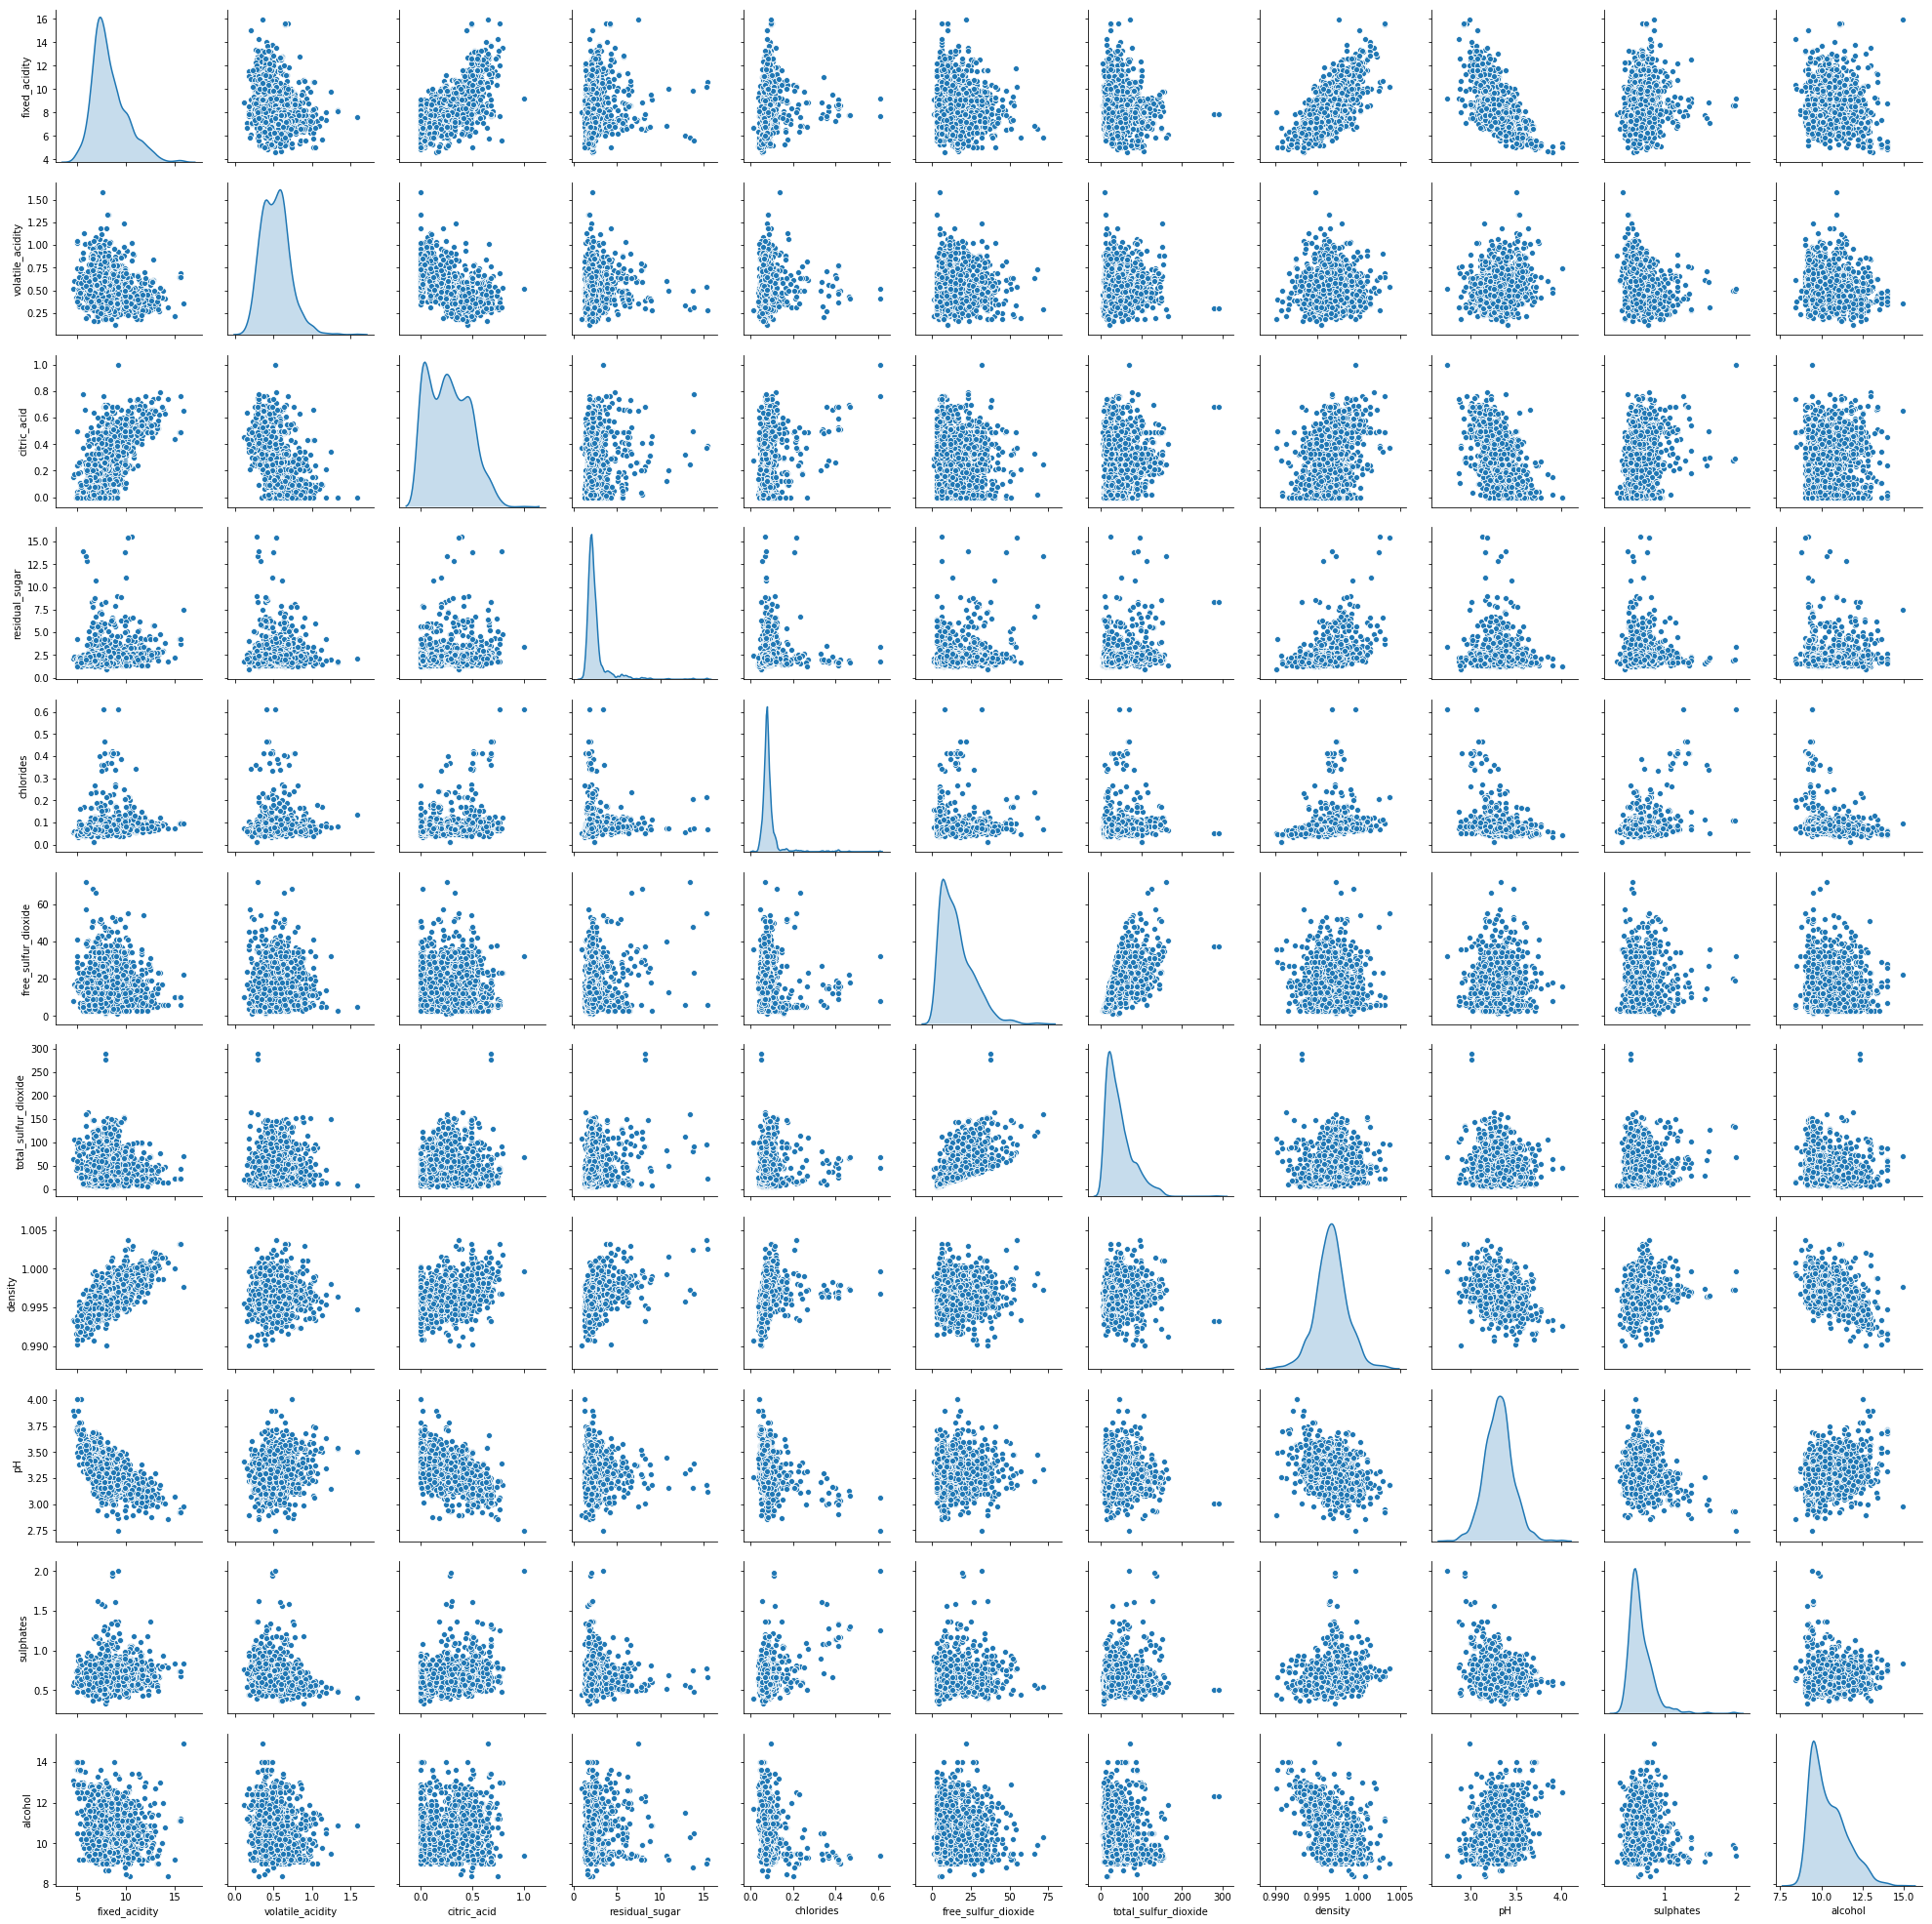

In [10]:
import seaborn as sns
sns.pairplot(wine_data,diag_kind='kde')

In [12]:
wine_data_scaled = wine_data.apply(zscore)

In [13]:
from sklearn.cluster import AgglomerativeClustering 

In [26]:
model = AgglomerativeClustering(n_clusters=6, affinity='euclidean',  linkage='average')

In [27]:
model.fit(wine_data_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=6, pooling_func=<function mean at 0x7ff5dc1447b8>)

In [16]:
wine_data_scaled['labels'] = model.labels_
type(wine_data_scaled)

pandas.core.frame.DataFrame

In [32]:
wine_data_scaled['labels'].value_counts()

0    1126
1     387
2      47
5      32
4       5
3       2
Name: labels, dtype: int64

In [17]:
wine_clusters = wine_data_scaled.groupby(['labels'])
#wine_clusters = wine_data_attr.groupby(['clusters'])

In [18]:
print(wine_clusters)

In [19]:
wine_groups=wine_clusters.head(1599)#This creates a pandas dataframegroupby object


In [20]:
from pandas import ExcelWriter
writer = ExcelWriter('wine_groups.xls')
wine_groups.to_excel(writer,'Sheet1')
writer.save()



In [21]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage

In [22]:
from scipy.spatial.distance import pdist

In [28]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(wine_data_scaled, 'average')#Average is having good score than ward
c, coph_dists = cophenet(Z , pdist(wine_data_scaled))

c

0.8208420846479004

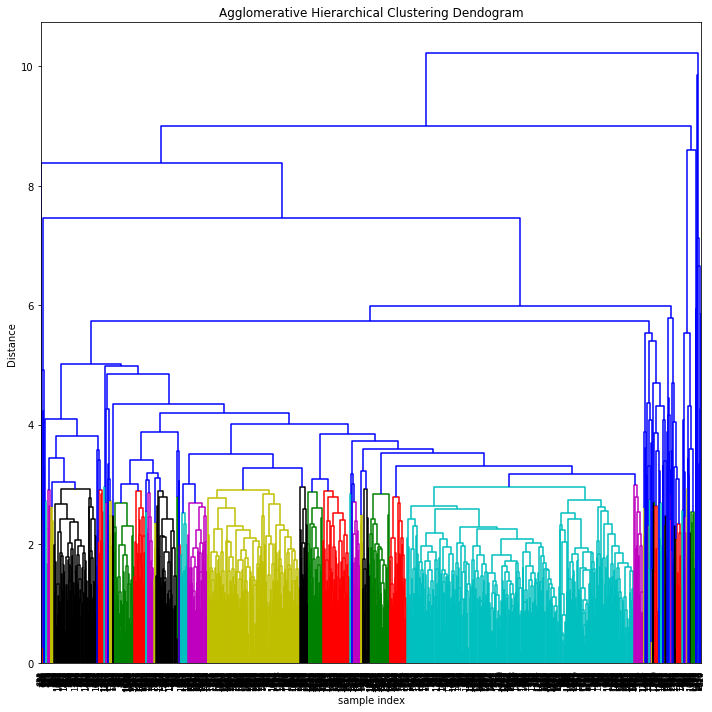

In [31]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90., color_threshold=3, leaf_font_size=8. )
plt.tight_layout()